In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
with open('/home/ahojel/visual_prompting_vid/output_dir/hyperparam_sweep5/log.txt', 'r') as file:
#with open('/home/ahojel/visual_prompting_vid/output_dir/doublelayer_1/log.txt', 'r') as file:
    data = file.readlines()


# Convert each line from string to dictionary
data = data[1:]
data = [eval(line.strip()) for line in data]

In [3]:
# Create a DataFrame
df = pd.DataFrame(data)

In [17]:
df[df["lambda"].isna()]

,query_name,support_name,task,lambda,metric,iou,accuracy,r_metric,r_iou,r_accuracy
37,2007_000042,2007_007168,label_colorization,NaN,0.819424,NaN,NaN,NaN,NaN,NaN
75,2007_000042,2007_007168,label_lowlight enhance,NaN,1.097845,NaN,NaN,NaN,NaN,NaN
113,2007_000042,2007_007168,label_inpaint single random,NaN,0.775855,NaN,NaN,NaN,NaN,NaN
151,2007_000123,2008_006553,label_segmentation,NaN,1.958523,0.744669,0.887266,NaN,NaN,NaN
189,2007_000123,2008_006553,label_colorization,NaN,0.737259,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
151809,2011_000173,2011_002644,label_inpaint single random,NaN,0.458734,NaN,NaN,NaN,NaN,NaN
151847,2011_000283,2007_005689,label_segmentation,NaN,2.913163,0.606631,0.837270,NaN,NaN,NaN
151885,2011_000283,2007_005689,label_colorization,NaN,0.459120,NaN,NaN,NaN,NaN,NaN
151923,2011_000283,2007_005689,label_lowlight enhance,NaN,0.472199,NaN,NaN,NaN,NaN,NaN


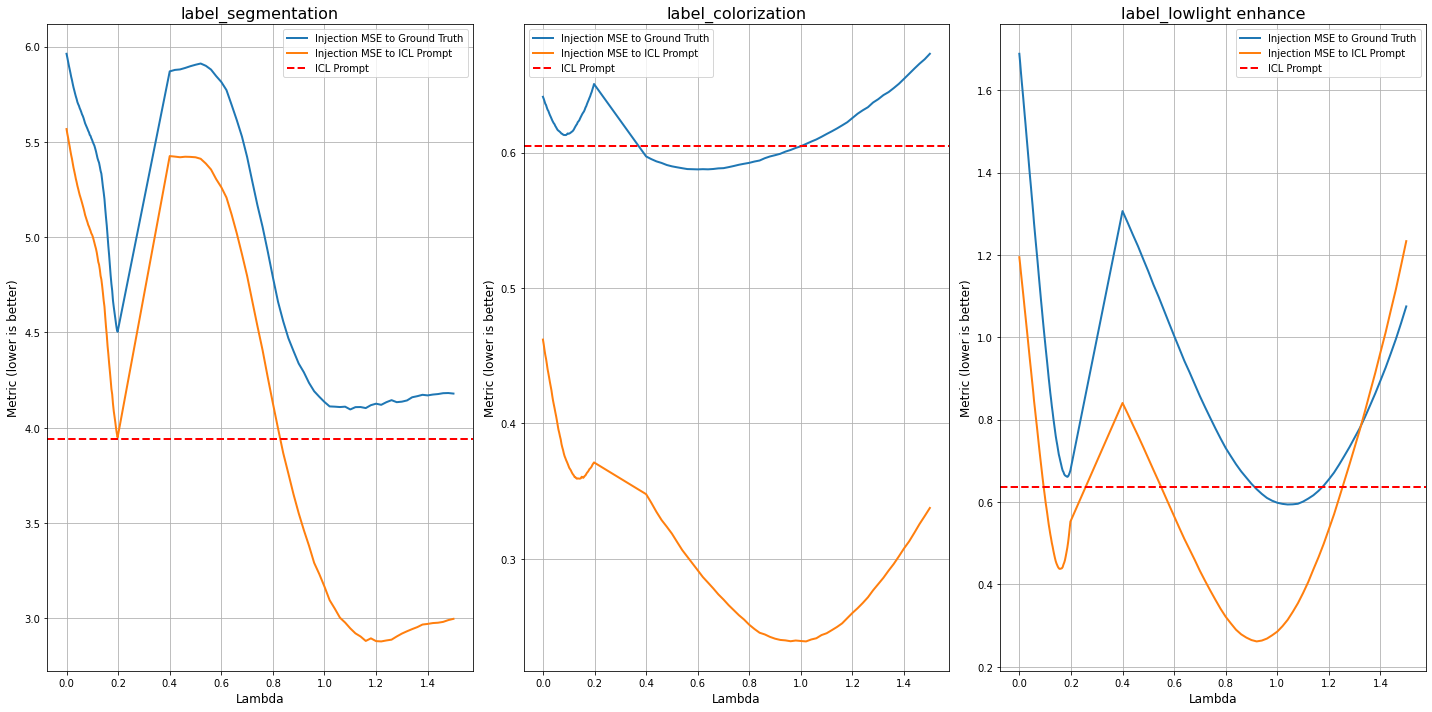

In [8]:
unique_tasks = df['task'].unique()
unique_tasks = ['label_segmentation', 'label_colorization', 'label_lowlight enhance']

# Setting up the grid for plotting - assuming there are 3 unique tasks
num_rows = 1
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

# Iterating over each task and creating a subplot
for i, task in enumerate(unique_tasks):
    # Calculate the column index for the current subplot
    col = i % num_cols

    # Filter the dataframe for the current task
    df_task = df[df['task'] == task]

    # Group by 'lambda' and calculate the mean for each group
    grouped_data = df_task.groupby(['lambda'])[['metric', 'r_metric']].mean().reset_index()

    # Convert to numpy arrays before plotting
    lambda_values = grouped_data['lambda'].to_numpy()
    metric_values = grouped_data['metric'].to_numpy()
    r_metric_values = grouped_data['r_metric'].to_numpy()

    # Plot the 'metric' and 'r_metric' for the selected layers
    axes[col].plot(lambda_values, metric_values, label='Injection MSE to Ground Truth', linewidth=2)
    axes[col].plot(lambda_values, r_metric_values, label='Injection MSE to ICL Prompt', linewidth=2)

    # Add a legend to the plot
    lines, labels = axes[col].get_legend_handles_labels()
    axes[col].legend(lines, labels, loc=0)
    baseline = df_task[df_task['lambda'].isna()]["metric"].mean()
    axes[col].axhline(y=baseline, color='red', linestyle='--', label='ICL Prompt', linewidth=2)
    
    axes[col].set_title(task, fontsize=16)
    axes[col].set_xlabel('Lambda', fontsize=12)
    axes[col].set_ylabel('Metric (lower is better)', fontsize=12)
    axes[col].legend()
    axes[col].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

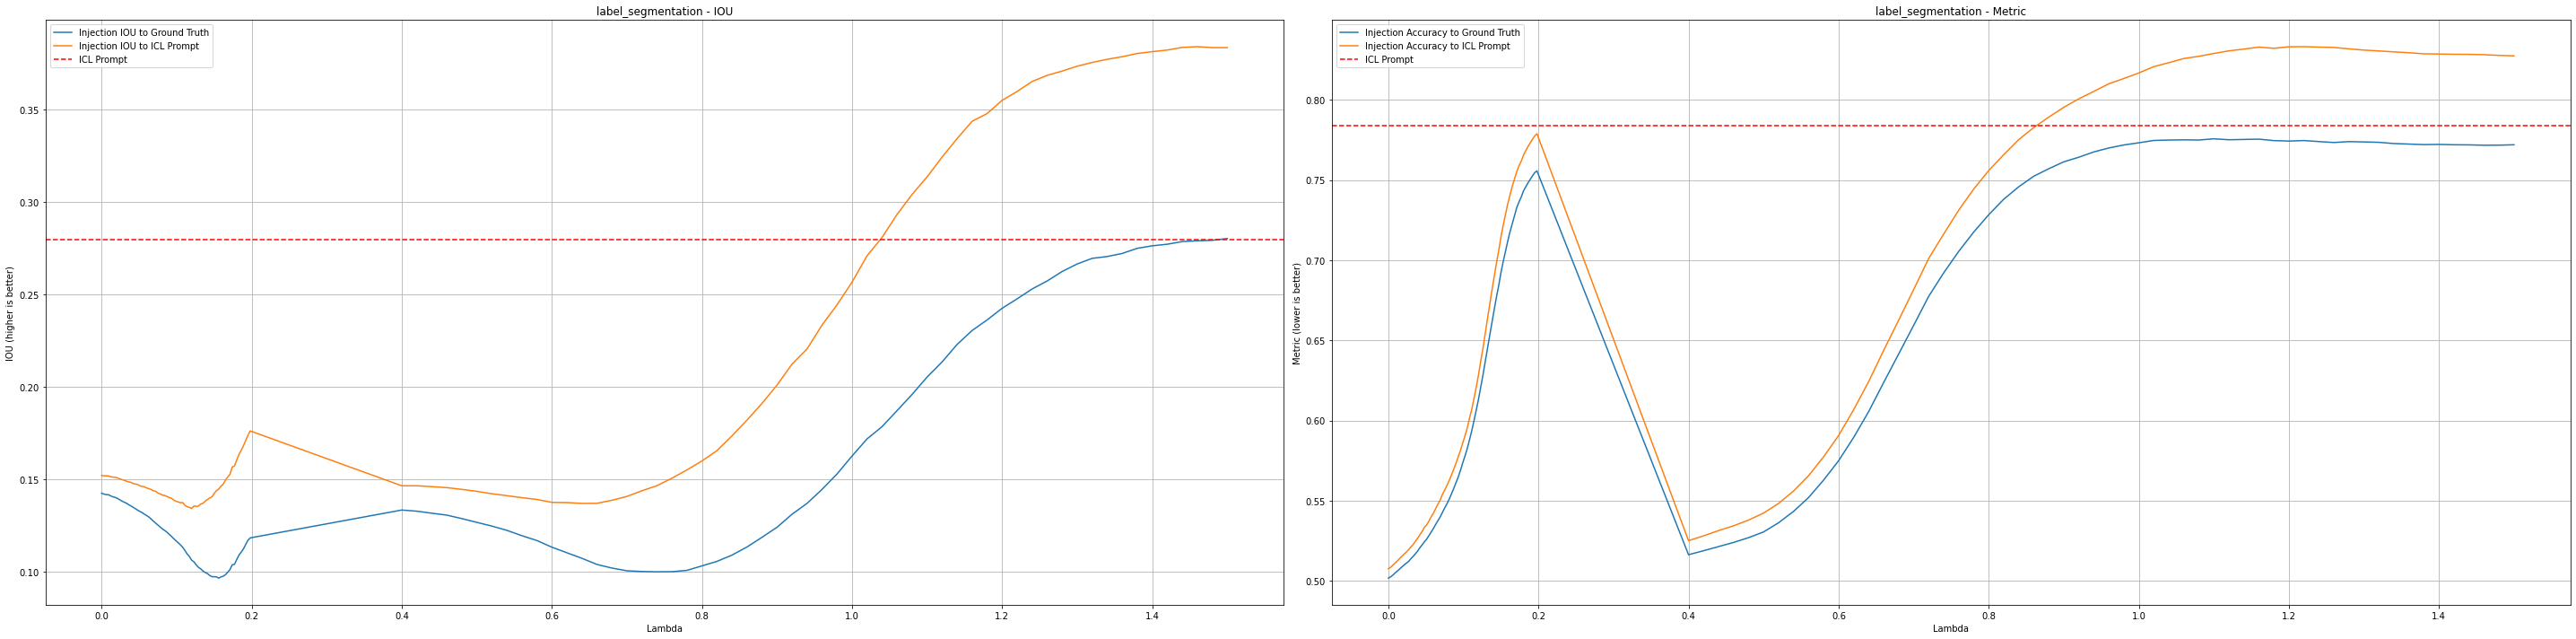

In [9]:
# Set the task to 'label_segmentation'
task = 'label_segmentation'

# Setting up the grid for plotting - only one row and two columns
num_rows = 1
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(40, 10))

# Filter the dataframe for the current task and group by 'lambda'
df_task = df[df['task'] == task]
df_baseline = df[df['task'] == task]

# Group by 'lambda', then calculate the mean for each group
grouped_data_iou = df_task.groupby(['lambda'])[['iou', 'r_iou']].mean().reset_index()
grouped_data_metric = df_task.groupby(['lambda'])[['accuracy', 'r_accuracy']].mean().reset_index()

# Convert to numpy arrays before plotting
lambda_values_iou = grouped_data_iou['lambda'].to_numpy()
iou_values = grouped_data_iou['iou'].to_numpy()
r_iou_values = grouped_data_iou['r_iou'].to_numpy()

lambda_values_metric = grouped_data_metric['lambda'].to_numpy()
metric_values = grouped_data_metric['accuracy'].to_numpy()
r_metric_values = grouped_data_metric['r_accuracy'].to_numpy()

# Plot the 'iou' and 'r_iou' for the selected layers
axes[0].plot(lambda_values_iou, iou_values, label='Injection IOU to Ground Truth')
axes[0].plot(lambda_values_iou, r_iou_values, label='Injection IOU to ICL Prompt')

# Add a legend to the plot
lines, labels = axes[0].get_legend_handles_labels()
axes[0].legend(lines, labels, loc=0)
baseline_iou = df_baseline[df_baseline['lambda'].isna()]["iou"].mean()
axes[0].axhline(y=baseline_iou, color='red', linestyle='--', label='ICL Prompt')

axes[0].set_title(task + ' - IOU')
axes[0].set_xlabel('Lambda')
axes[0].set_ylabel('IOU (higher is better)')
axes[0].legend()
axes[0].grid(True)

# Plot the 'metric' and 'r_metric' for the selected layers
axes[1].plot(lambda_values_metric, metric_values, label='Injection Accuracy to Ground Truth')
axes[1].plot(lambda_values_metric, r_metric_values, label='Injection Accuracy to ICL Prompt')

# Add a legend to the plot
lines, labels = axes[1].get_legend_handles_labels()
axes[1].legend(lines, labels, loc=0)
baseline_metric = df_baseline[df_baseline['lambda'].isna()]["accuracy"].mean()
axes[1].axhline(y=baseline_metric, color='red', linestyle='--', label='ICL Prompt')

axes[1].set_title(task + ' - Metric')
axes[1].set_xlabel('Lambda')
axes[1].set_ylabel('Metric (lower is better)')
axes[1].legend()
axes[1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [10]:
df

,query_name,support_name,task,lambda,metric,iou,accuracy,r_metric,r_iou,r_accuracy,all_layers
0,2007_000042,2007_007168,label_segmentation,0.000,5.026886,0.348667,0.516192,4.555518,0.236417,0.555150,NaN
1,2007_000042,2007_007168,label_segmentation,0.400,5.311234,0.356744,0.541352,4.529638,0.263795,0.600438,NaN
2,2007_000042,2007_007168,label_segmentation,0.420,5.344633,0.351759,0.539323,4.527065,0.257968,0.599383,NaN
3,2007_000042,2007_007168,label_segmentation,0.440,5.343618,0.353550,0.538917,4.529680,0.265695,0.603198,NaN
4,2007_000042,2007_007168,label_segmentation,0.460,5.324456,0.350859,0.537051,4.510439,0.252908,0.593377,NaN
...,...,...,...,...,...,...,...,...,...,...,...
499994,2011_000283,2007_005689,label_inpaint single random,0.186,0.849293,NaN,NaN,0.696413,NaN,NaN,True
499995,2011_000283,2007_005689,label_inpaint single random,0.189,0.832556,NaN,NaN,0.689263,NaN,NaN,True
499996,2011_000283,2007_005689,label_inpaint single random,0.192,0.837524,NaN,NaN,0.695926,NaN,NaN,True
499997,2011_000283,2007_005689,label_inpaint single random,0.195,0.849801,NaN,NaN,0.698676,NaN,NaN,True


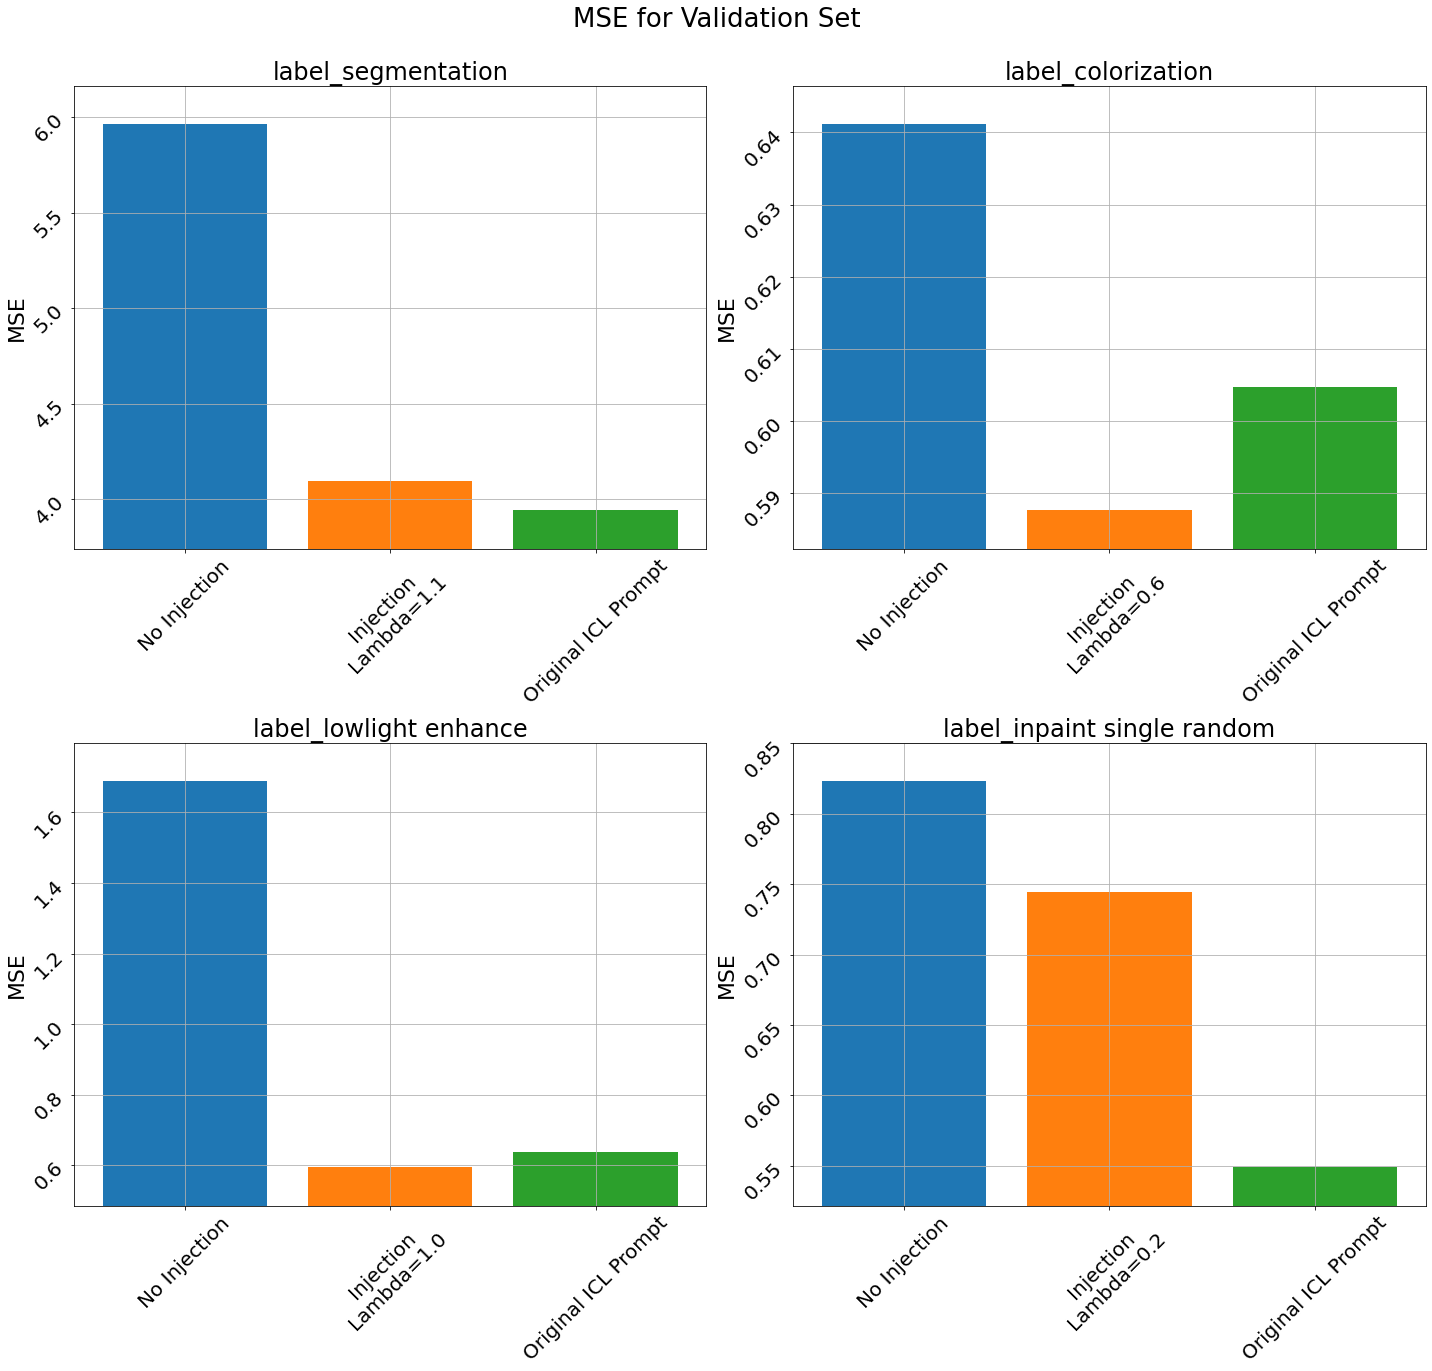

In [16]:
unique_tasks = df['task'].unique()
# Setting up the grid for plotting - assuming there are 4 unique tasks
num_rows = 2
num_cols = 2

unique_tasks = ['label_segmentation', 'label_colorization', 'label_lowlight enhance', "label_inpaint single random"]

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))  # Adjusted for more space

# Iterating over each task and creating a subplot
for i, task in enumerate(unique_tasks):
    row = i // num_cols
    col = i % num_cols
    df_task = df[df['task'] == task]
    grouped_data = df_task.groupby(['lambda'])[['metric',"r_metric"]].mean().reset_index()

    lambda_zero_metric = grouped_data[grouped_data['lambda'] == 0]['metric'].mean()
    baseline_metric = df_task[df_task['lambda'].isna()]["metric"].mean()
    best_lambda_index = grouped_data['metric'].idxmin()
    best_lambda = grouped_data.loc[best_lambda_index, 'lambda']
    best_lambda_metric = grouped_data.loc[best_lambda_index, 'metric']

    bar_labels = ['No Injection', f'Injection\nLambda={best_lambda:.1f}', 'Original ICL Prompt']
    bar_values = [lambda_zero_metric, best_lambda_metric, baseline_metric]
    axes[row, col].bar(bar_labels, bar_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])  # Example colors

    axes[row, col].set_title(task, fontsize=24)
    axes[row, col].set_ylabel('MSE', fontsize=22)
    axes[row, col].grid(True)
    axes[row, col].tick_params(labelrotation=45, labelsize=20)
    axes[row, col].set_ylim([min(bar_values)-0.1*(max(bar_values) - min(bar_values)), max(bar_values)+0.1*(max(bar_values) - min(bar_values))])  # Rotate labels and adjust size

# Adjust layout to prevent overlap
fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rectangle in which to fit subplots
fig.suptitle("MSE for Validation Set", fontsize=26)
plt.show()


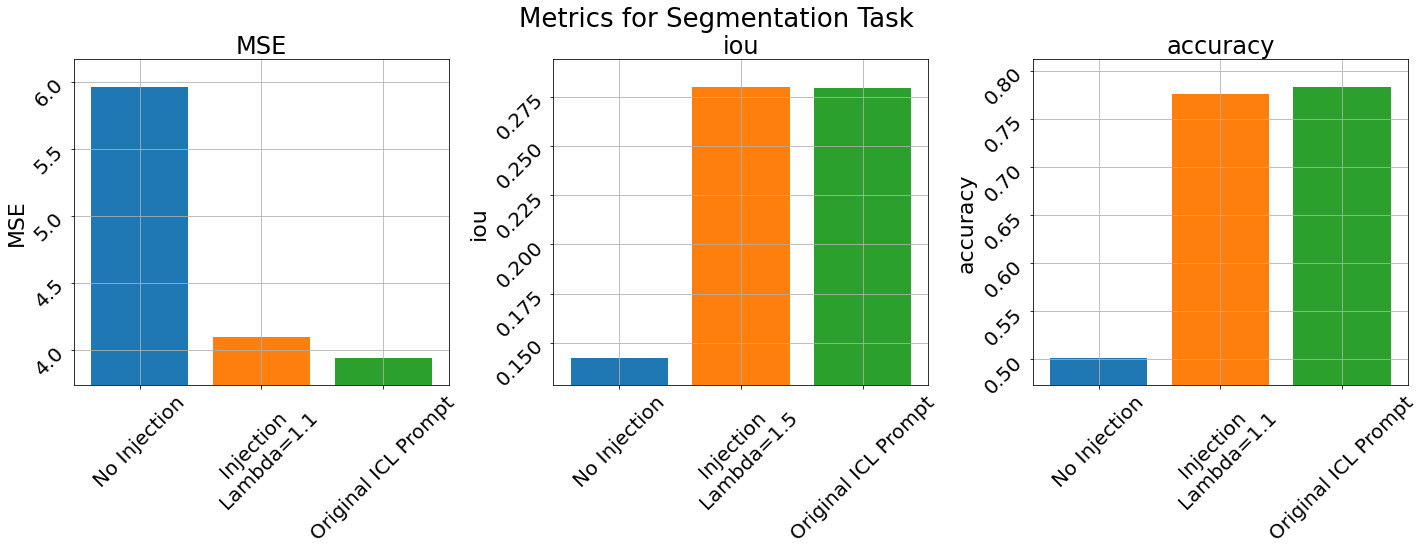

In [19]:
unique_tasks = df['task'].unique()
# Setting up the grid for plotting - assuming there are 3 unique tasks
num_rows = 1
num_cols = 3

unique_tasks = ['label_segmentation']

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 8))  # Adjusted for more space

# Iterating over each task and creating a subplot
for i, task in enumerate(unique_tasks):
    df_task = df[df['task'] == task]
    grouped_data = df_task.groupby(['lambda'])[['metric',"r_metric", "iou", "r_iou", "accuracy", "r_accuracy"]].mean().reset_index()

    metrics = ['metric', 'iou', 'accuracy']
    for j, metric in enumerate(metrics):
        lambda_zero_metric = grouped_data[grouped_data['lambda'] == 0][metric].mean()
        baseline_metric = df_task[df_task['lambda'].isna()][metric].mean()
        if metric == 'metric':
            best_lambda_index = grouped_data[metric].idxmin()
        else:
            best_lambda_index = grouped_data[metric].idxmax()
        best_lambda = grouped_data.loc[best_lambda_index, 'lambda']
        best_lambda_metric = grouped_data.loc[best_lambda_index, metric]

        bar_labels = ['No Injection', f'Injection\nLambda={best_lambda:.1f}', 'Original ICL Prompt']
        bar_values = [lambda_zero_metric, best_lambda_metric, baseline_metric]
        axes[j].bar(bar_labels, bar_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])  # Example colors
        metric = "MSE" if metric == "metric" else metric
        axes[j].set_title(f'{metric}', fontsize=24)
        axes[j].set_ylabel(metric, fontsize=22)
        axes[j].grid(True)
        axes[j].tick_params(labelrotation=45, labelsize=20)
        axes[j].set_ylim([min(bar_values)-0.1*(max(bar_values) - min(bar_values)), max(bar_values)+0.1*(max(bar_values) - min(bar_values))])  # Rotate labels and adjust size

# Adjust layout to prevent overlap
fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rectangle in which to fit subplots
fig.suptitle("Metrics for Segmentation Task", fontsize=26)
plt.show()


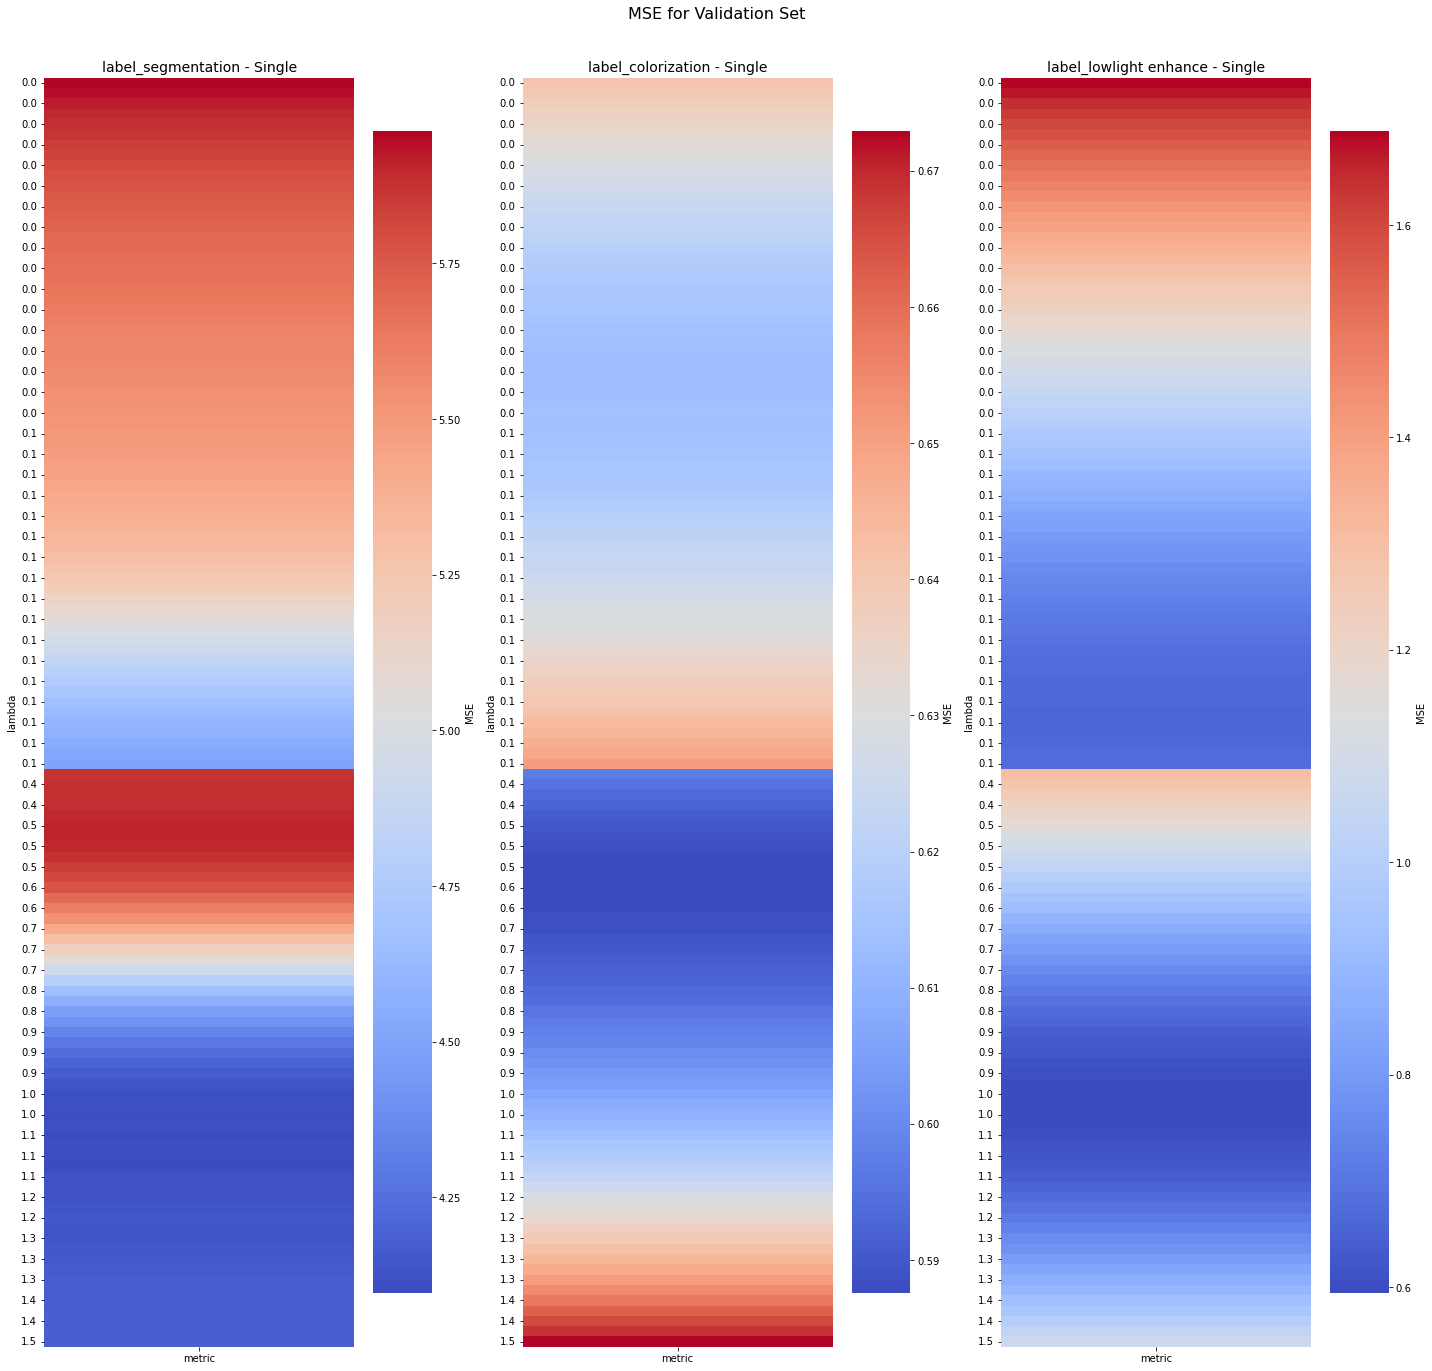

In [26]:
unique_tasks = ['label_segmentation', 'label_colorization', 'label_lowlight enhance']
# Setting up the grid for plotting - assuming there are 3 unique tasks
num_rows = 1
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))  # Adjusted for more space

# Iterating over each task and creating a heatmap
for i, task in enumerate(unique_tasks):
    df_task_single = df[df['task'] == task]

    pivot_table_single = df_task_single.pivot_table(index='lambda', values='metric')

    # Get the baseline metric for the task
    baseline_metric = df_task_single[df_task_single['lambda'].isna()]["metric"].mean()

    # Set cells with worse performance than the baseline to a large value
    #pivot_table_single = pivot_table_single.applymap(lambda x: np.nan if x > baseline_metric else x)

    # Plotting the heatmap
    sns.heatmap(pivot_table_single, ax=axes[i], cmap='coolwarm', cbar_kws={'label': 'MSE'}, mask=pivot_table_single.isnull())

    axes[i].set_title(f"{task} - Single", fontsize=14)

    y_labels_single = axes[i].get_yticklabels()

    axes[i].set_yticklabels([label.get_text()[:3] for label in y_labels_single])  # Show only first 3 sig figs in lambda y axis

# Adjust layout to prevent overlap
fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rectangle in which to fit subplots
fig.suptitle("MSE for Validation Set", fontsize=16)
plt.show()


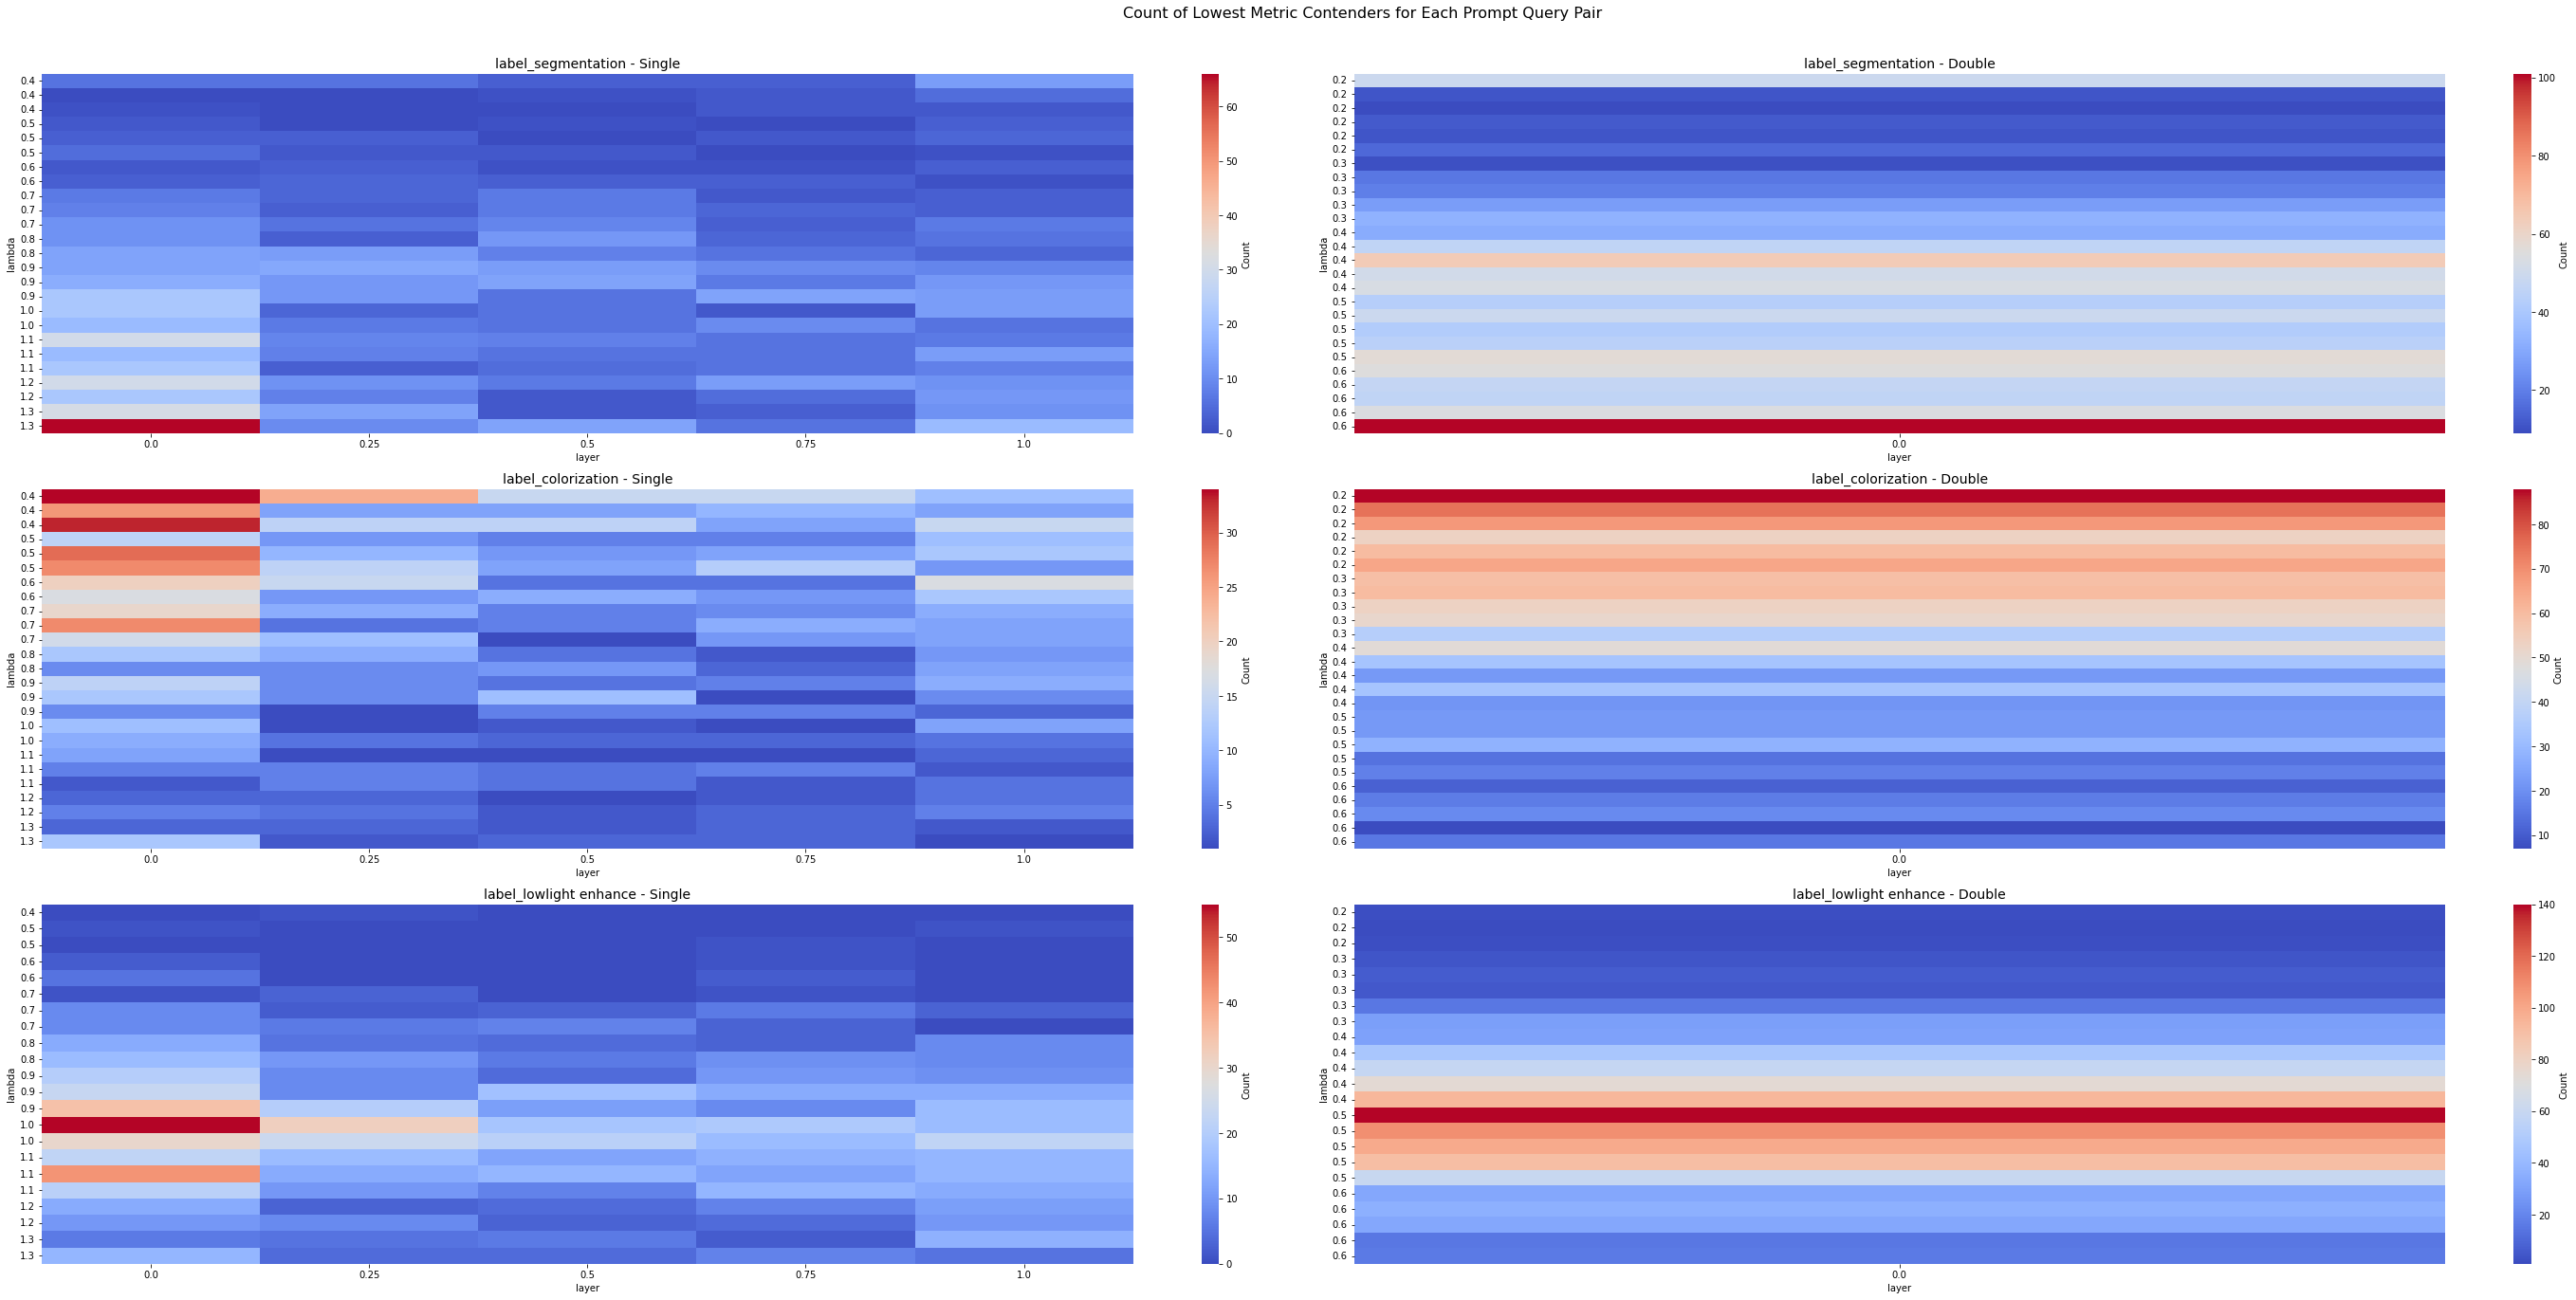

In [49]:
unique_tasks = ['label_segmentation', 'label_colorization', 'label_lowlight enhance']
# Setting up the grid for plotting - assuming there are 3 unique tasks
num_rows = 3
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(40, 20))  # Adjusted for more space

# Iterating over each task and creating a heatmap
for i, task in enumerate(unique_tasks):
    df_task_single = df[(df['task'] == task) & (df['style'] == 'single')]
    df_task_double = df[(df['task'] == task) & (df['style'] == 'double')]
    df_baseline = df[df['task'] == task]

    # For each unique 'query_name' and 'support_name' combination, find the lambda and layer that minimizes the metric
    best_lambdas_single = df_task_single.groupby(['query_name', 'support_name'])['metric'].idxmin()
    best_lambda_data_single = df_task_single.loc[best_lambdas_single]
    best_lambdas_double = df_task_double.groupby(['query_name', 'support_name'])['metric'].idxmin()
    best_lambda_data_double = df_task_double.loc[best_lambdas_double]

    # Count the number of times each lambda and layer pair appears as a lowest metric contender
    lambda_layer_counts_single = best_lambda_data_single.groupby(['lambda', 'layer']).size().unstack(fill_value=0)
    lambda_layer_counts_double = best_lambda_data_double.groupby(['lambda', 'layer']).size().unstack(fill_value=0)

    # Plotting the heatmap
    sns.heatmap(lambda_layer_counts_single, ax=axes[i, 0], cmap='coolwarm', cbar_kws={'label': 'Count'})
    sns.heatmap(lambda_layer_counts_double, ax=axes[i, 1], cmap='coolwarm', cbar_kws={'label': 'Count'})
    axes[i, 0].set_title(f"{task} - Single", fontsize=14)
    axes[i, 1].set_title(f"{task} - Double", fontsize=14)

    y_labels_single = axes[i, 0].get_yticklabels()
    y_labels_double = axes[i, 1].get_yticklabels()

    axes[i, 0].set_yticklabels([label.get_text()[:3] for label in y_labels_single])  # Show only first 3 sig figs in lambda y axis
    axes[i, 1].set_yticklabels([label.get_text()[:3] for label in y_labels_double])  # Show only first 3 sig figs in lambda y axis

# Adjust layout to prevent overlap
fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rectangle in which to fit subplots
fig.suptitle("Count of Lowest Metric Contenders for Each Prompt Query Pair", fontsize=16)
plt.show()


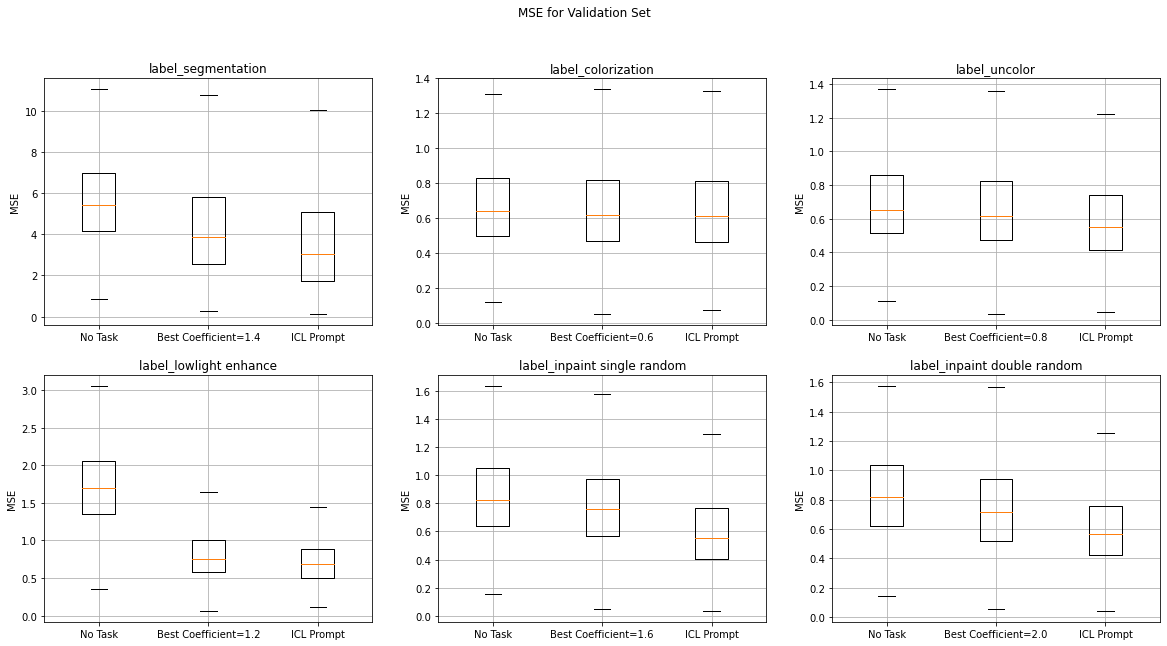